In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_json('tweets_cleaned.json', lines=True)

#### Australian based users

In [3]:
# Display the first few rows of the dataset
print(data.head())

# Average sentiment of the tweets
data['Sentiment'].mean()

print(data['Sentiment'].mean())

# Number of rows in the dataset
print(data.shape[0])

                 Created_At  Sentiment   
0 2021-06-21 03:18:59+00:00   0.714286  \
1 2021-06-21 03:21:05+00:00   0.363636   
2 2021-06-21 10:56:40+00:00   0.250000   
3 2021-06-21 23:36:59+00:00  -0.095238   
4 2021-06-21 04:14:46+00:00   0.300000   

                                                Text  
0                                Such a cute pupper   
1    Nawww thanks!  *Nuzzles* right back at ya pup!   
2    Thanks. Sorry missed that. Great result though.  
3  It's bizarre, who says 3 days is enough to pro...  
4   Don't you just love black and white photography?  
0.08912931113465408
4318767


# Scenario 1
## Explaoratory Data Analysis

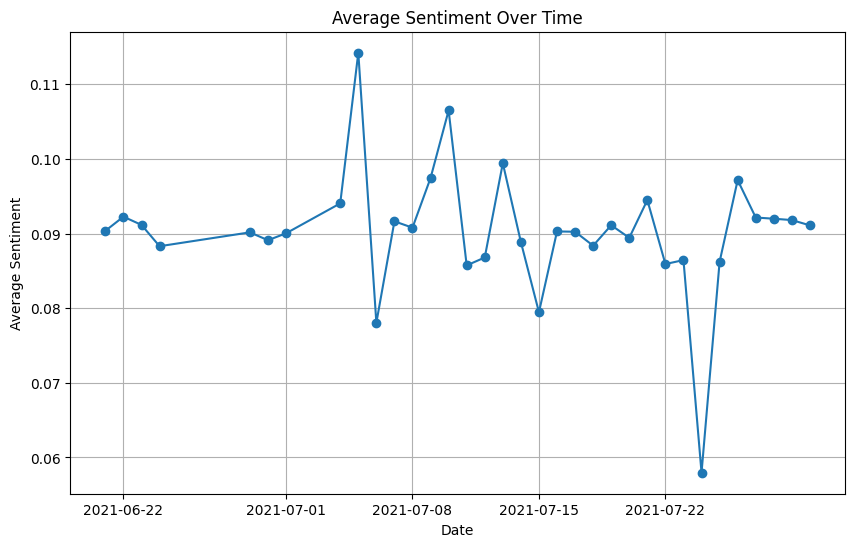

In [22]:
#####################################
# Average Sentiment Over Time
#####################################

# Convert Created_At to datetime
data['Created_At'] = pd.to_datetime(data['Created_At'])

# Extract the date from Created_At
data['Date'] = data['Created_At'].dt.date

# Remove rows with date 2021-12-21
data = data[data['Date'] != pd.Timestamp(2021, 12, 21).date()]

# Group by date and calculate the average sentiment
daily_sentiment = data.groupby('Date')['Sentiment'].mean().reset_index()

# Plot the average sentiment over time
plt.figure(figsize=(10, 6))
plt.plot(daily_sentiment['Date'], daily_sentiment['Sentiment'], marker='o')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment Over Time')
plt.grid(True)
plt.show()

# Convert the 'Date' column to a string format directly without using .dt
daily_sentiment['Date'] = daily_sentiment['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

# Export the daily_sentiment dataframe to a json file
daily_sentiment.to_json('daily_average_sentiment.json', orient='records', lines=True)

In [19]:
#####################################
# The most busiest day and quietest day
#####################################

# Group by date and calculate the number of tweets
daily_tweets = data.groupby('Date').size().reset_index(name='Number of Tweets')

# Find the date with the most tweets
busiest_day = daily_tweets[daily_tweets['Number of Tweets'] == daily_tweets['Number of Tweets'].max()]

# Find the date with the least tweets
quietest_day = daily_tweets[daily_tweets['Number of Tweets'] == daily_tweets['Number of Tweets'].min()]

# Display the busiest day
print(busiest_day)

# Display the quietest day
print(quietest_day)

# Display the dates with non-zero tweets
print(daily_tweets[daily_tweets['Number of Tweets'] > 0])

#####################################
# The most five positive and negative tweets of the busiest day
#####################################
# Filter the data for the busiest day
busiest_day_data = data[data['Date'] == busiest_day['Date'].values[0]]

# Sort the data by sentiment
busiest_day_data = busiest_day_data.sort_values('Sentiment', ascending=False)

# Display the most positive tweets
print(busiest_day_data[['Text', 'Sentiment']].head())

# Display the most negative tweets
print(busiest_day_data[['Text', 'Sentiment']].tail())

#####################################
# The most five positive and negative tweets of the quietest day
#####################################
# Find the date with the least tweets
quietest_day = daily_tweets[daily_tweets['Number of Tweets'] == daily_tweets['Number of Tweets'].min()]

# Filter the data for the quietest day
quietest_day_data = data[data['Date'] == quietest_day['Date'].values[0]]

# Sort the data by sentiment
quietest_day_data = quietest_day_data.sort_values('Sentiment', ascending=False)

# Display the most positive tweets
print(quietest_day_data[['Text', 'Sentiment']].head())

# Display the most negative tweets
print(quietest_day_data[['Text', 'Sentiment']].tail())



          Date  Number of Tweets
27  2021-07-24            166942
         Date  Number of Tweets
8  2021-07-05              5060
          Date  Number of Tweets
0   2021-06-21            111676
1   2021-06-22            118159
2   2021-06-23            121139
3   2021-06-24            112884
4   2021-06-29            134724
5   2021-06-30            137331
6   2021-07-01            114796
7   2021-07-04             30182
8   2021-07-05              5060
9   2021-07-06            141169
10  2021-07-07             99725
11  2021-07-08             91671
12  2021-07-09            126915
13  2021-07-10            125982
14  2021-07-11            138459
15  2021-07-12            133079
16  2021-07-13            130007
17  2021-07-14            138950
18  2021-07-15            124135
19  2021-07-16            129997
20  2021-07-17            136075
21  2021-07-18            138788
22  2021-07-19            139491
23  2021-07-20            141562
24  2021-07-21            147128
25  2021-07-

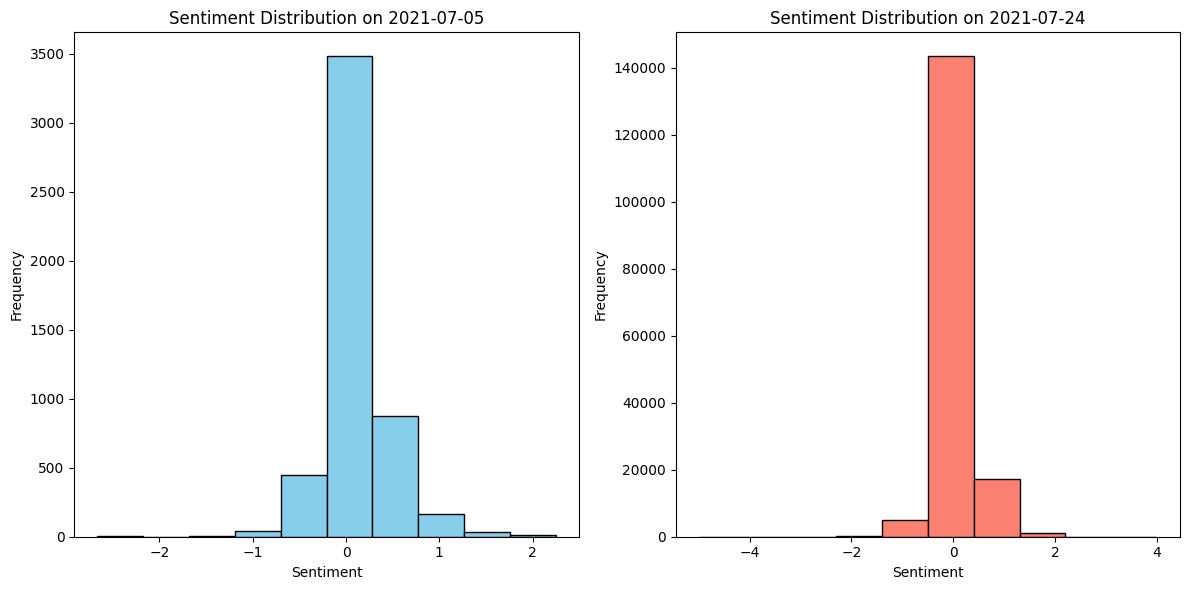

In [10]:
#####################################
# Historgram of The Highest and Lowest Average Sentiment Days
#####################################

# Identify the days with the highest and lowest average sentiment
max_avg_sentiment_date = daily_sentiment.loc[daily_sentiment['Sentiment'].idxmax(), 'Date']
min_avg_sentiment_date = daily_sentiment.loc[daily_sentiment['Sentiment'].idxmin(), 'Date']

# Filter the dataset for these days
max_sentiment_df = data[data['Date'] == max_avg_sentiment_date]
min_sentiment_df = data[data['Date'] == min_avg_sentiment_date]

# Combine the data for plotting
plot_data = pd.concat([max_sentiment_df, min_sentiment_df])
plot_data['Date'] = plot_data['Date'].astype(str)

# Plot the histograms
plt.figure(figsize=(12, 6))

# Histogram for the day with the highest average sentiment
plt.subplot(1, 2, 1)
plt.hist(max_sentiment_df['Sentiment'], bins=10, color='skyblue', edgecolor='black')
plt.title(f'Sentiment Distribution on {max_avg_sentiment_date}')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# Histogram for the day with the lowest average sentiment
plt.subplot(1, 2, 2)
plt.hist(min_sentiment_df['Sentiment'], bins=10, color='salmon', edgecolor='black')
plt.title(f'Sentiment Distribution on {min_avg_sentiment_date}')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [7]:
#####################################
# Top Five Sentiment Tweets Per Day
#####################################

# Sort the DataFrame by Date and Sentiment in descending order
data_sorted = data.sort_values(by=['Date', 'Sentiment'], ascending=[True, False])

# Group by Date and take the top five sentiment tweets for each day
top_sentiments_per_day = data_sorted.groupby('Date').head(5)

# Display the top five sentiment tweets for each day
print(top_sentiments_per_day)


                       Created_At  Sentiment                     Text   
32253   2021-06-21 03:00:51+00:00   4.000000                Fantastic  \
43422   2021-06-21 04:59:07+00:00   3.000000                     nice   
49727   2021-06-21 23:10:53+00:00   3.000000                   *super   
49790   2021-06-21 06:53:10+00:00   3.000000                     nice   
17383   2021-06-21 03:11:52+00:00   2.666667                  Wow wow   
...                           ...        ...                      ...   
4251415 2021-07-30 07:24:51+00:00   4.000000                    LMFAO   
4282733 2021-07-30 11:10:53+00:00   4.000000                 Amazing!   
4284654 2021-07-30 11:26:35+00:00   4.000000                  amazing   
4285573 2021-07-30 11:33:45+00:00   3.200000  Wow wow wow , fantastic   
4177342 2021-07-30 23:02:46+00:00   3.000000              Wow wow wow   

               Date  
32253    2021-06-21  
43422    2021-06-21  
49727    2021-06-21  
49790    2021-06-21  
17383    2021